## Importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy 
from sklearn.preprocessing import StandardScaler , OneHotEncoder , MinMaxScaler , OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score , recall_score , f1_score , accuracy_score
from sklearn.model_selection import cross_val_predict , GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")
import itertools    
from sklearn.feature_selection import SelectKBest , f_regression 

In [2]:
dataset = pd.read_csv('C:\\Users\\hp\\Downloads\\heart.csv')

## Exploratory Data Analysis


In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
dataset.duplicated().sum()

723

In [9]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
for col in dataset[["sex" , "cp" , "fbs" ,"restecg" , "exang" ,"thal" , "ca" , "slope"  , "target"]]:
    print(dataset[col].value_counts()) 
    print("---------------------------")

1    713
0    312
Name: sex, dtype: int64
---------------------------
0    497
2    284
1    167
3     77
Name: cp, dtype: int64
---------------------------
0    872
1    153
Name: fbs, dtype: int64
---------------------------
1    513
0    497
2     15
Name: restecg, dtype: int64
---------------------------
0    680
1    345
Name: exang, dtype: int64
---------------------------
2    544
3    410
1     64
0      7
Name: thal, dtype: int64
---------------------------
0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64
---------------------------
1    482
2    469
0     74
Name: slope, dtype: int64
---------------------------
1    526
0    499
Name: target, dtype: int64
---------------------------


## Data Visualisation

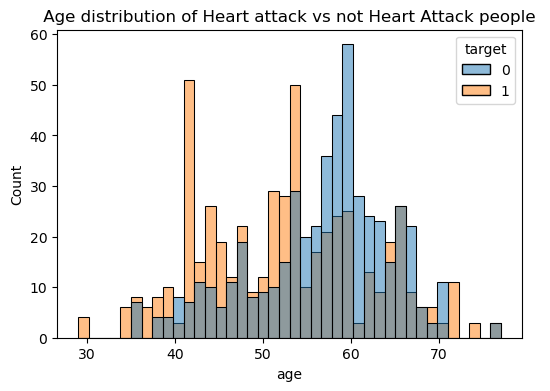

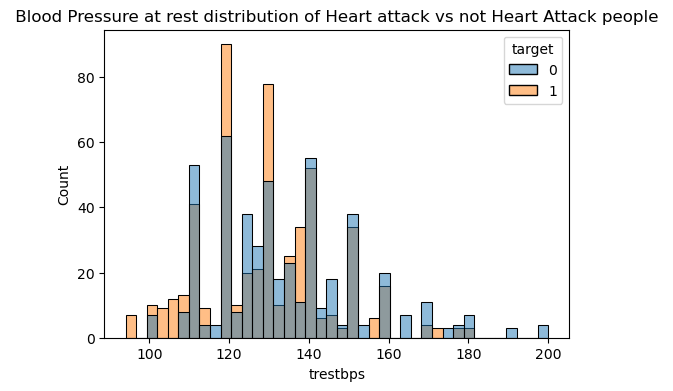

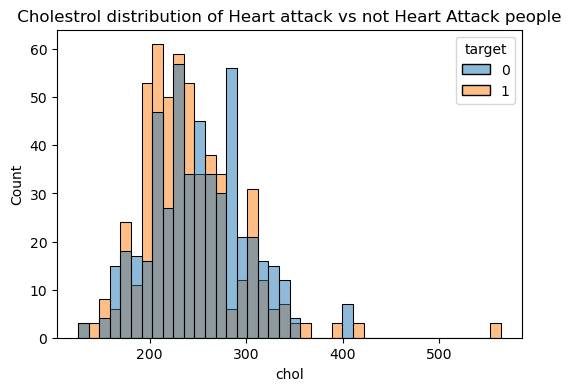

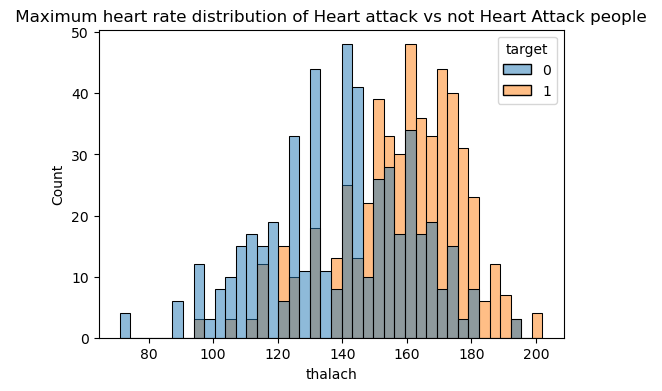

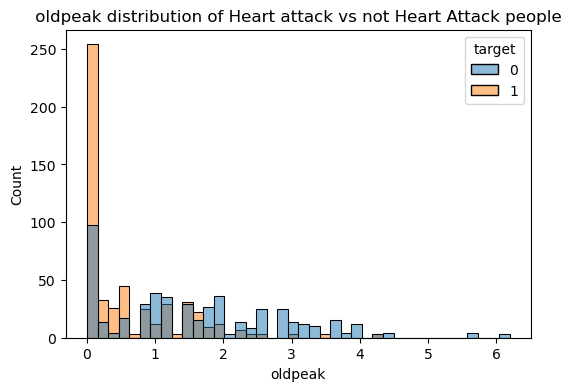

In [11]:
Dictionary={"age":"Age" , "trestbps":"Blood Pressure at rest" , "chol":"Cholestrol", "thalach":"Maximum heart rate" , "oldpeak":"oldpeak"}
for col in dataset[["age" ,"trestbps" ,  "chol" , "thalach" , "oldpeak"]]:
    plt.figure(figsize=(6 , 4))
    sns.histplot(x=col, data=dataset , bins=40  , hue="target")
    plt.title(f" {Dictionary[col]} distribution of Heart attack vs not Heart Attack people ")
    plt.show()

<Figure size 1000x800 with 0 Axes>

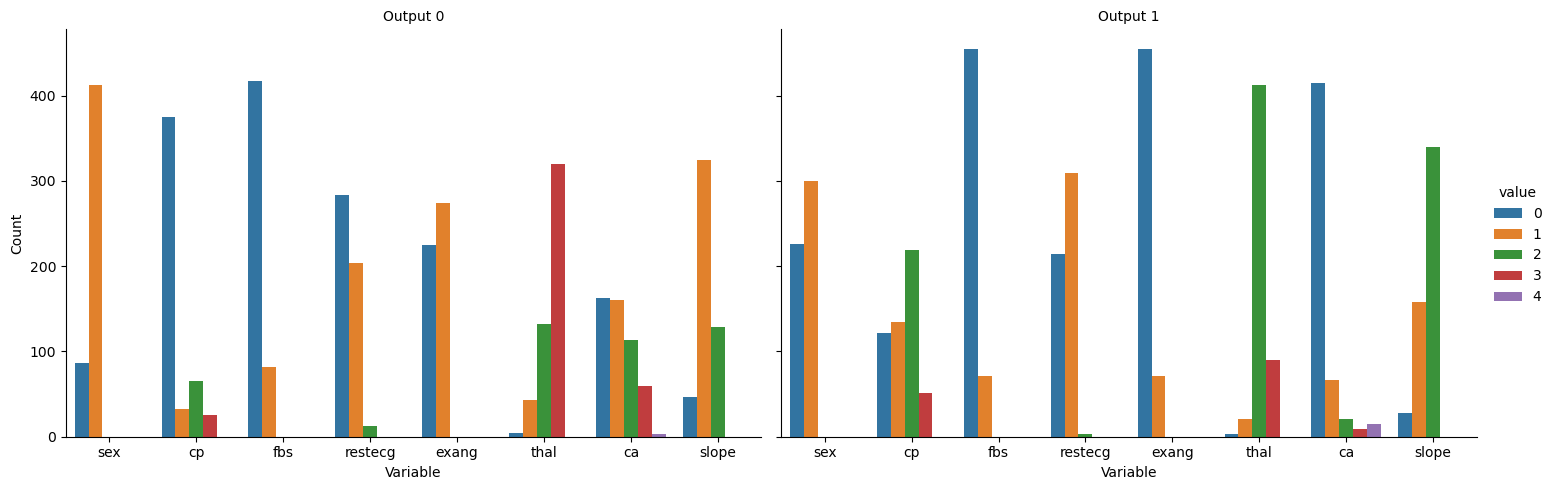

In [12]:
cols = ["sex" , "cp" , "fbs" ,"restecg" , "exang" ,"thal" , "ca" , "slope"  ]
plt.figure(figsize=(10 , 8))
df_long = pd.melt(dataset, id_vars=["target"], value_vars=cols)

diagram = sns.catplot( x="variable", hue="value", col="target",data=df_long, kind="count",aspect=1.5)

diagram.set_axis_labels("Variable", "Count")
diagram.set_titles("Output {col_name}")
plt.show()

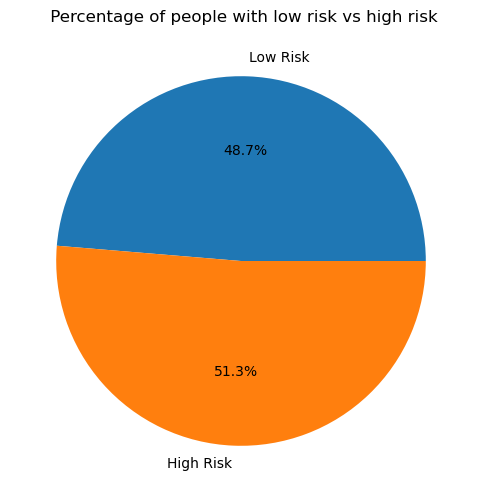

In [13]:
plt.figure(figsize=(8 , 6))
labels=["Low Risk" , "High Risk"]
sizes=[dataset.target.value_counts()[0] ,dataset.target.value_counts()[1]]
plt.pie(sizes, labels=labels , autopct='%1.1f%%')
plt.title(" Percentage of people with low risk vs high risk")
plt.axis('off')
plt.show()

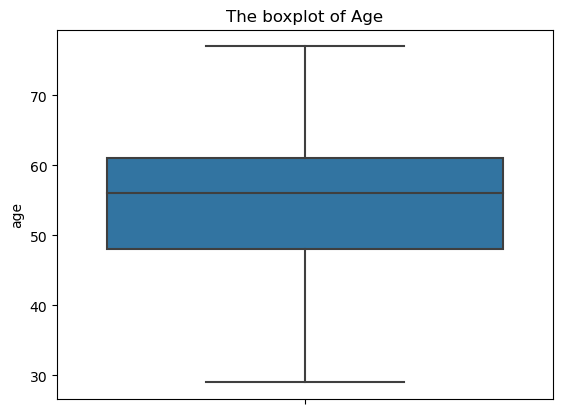

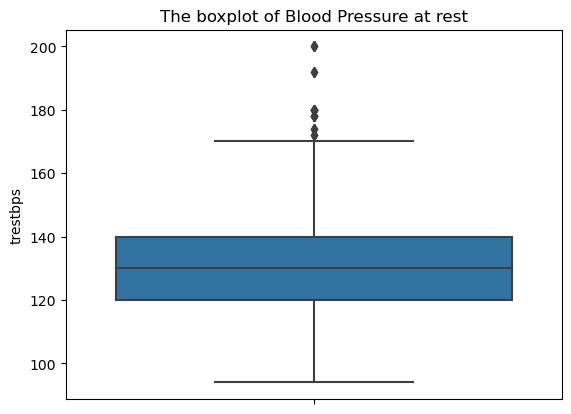

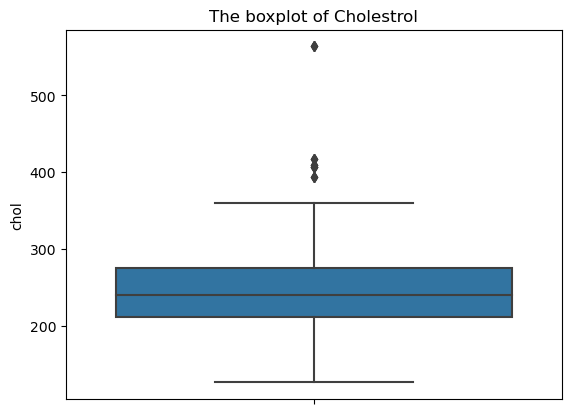

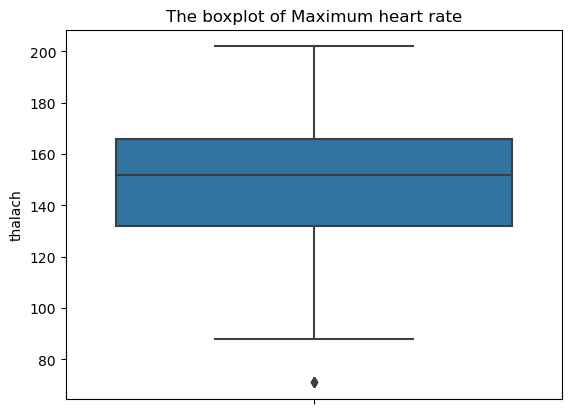

In [14]:
Dictionary={"age":"Age" , "trestbps":"Blood Pressure at rest" , "chol":"Cholestrol", "thalach":"Maximum heart rate"}
for col in dataset[["age" , "trestbps" ,  "chol" , "thalach"]]:
    sns.boxplot(y=col , data=dataset)
    plt.xlabel={col}
    plt.title(f"The boxplot of {Dictionary[col]}")
    plt.show()

<Axes: >

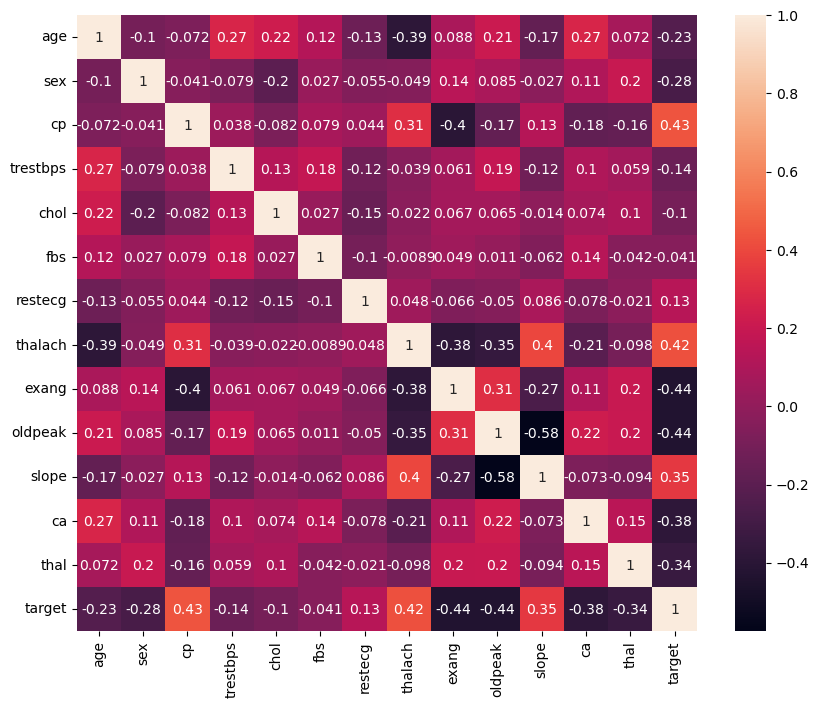

In [15]:
plt.figure(figsize=(10 , 8))
sns.heatmap(dataset.corr() , annot=True)

## Preprocessing

In [16]:
dataset.shape

(1025, 14)

In [17]:
def outlier (col):
        Q1 = dataset[col].quantile(0.25)
        Q3 = dataset[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR

        upper_array = np.where(dataset[col]>=upper)[0]
        lower_array = np.where(dataset[col]<=lower)[0]

        dataset.drop(index=upper_array, inplace=True)
        dataset.drop(index=lower_array, inplace=True)

In [18]:
for col in ["age" ,"trestbps" ,  "chol" , "thalach" , "oldpeak"]:
    if '[609] not found in axis':
        continue
    else :
        outlier(col)

In [19]:
y , x =dataset["target"] , dataset.drop("target" , axis=1)

In [20]:
selector=SelectKBest(score_func=f_regression , k=9)
x_selected=selector.fit_transform(x , y)
selected_indices=np.argsort(selector.scores_)[::-1][:7]
selected_features=x.columns[selected_indices]
selected_features

Index(['oldpeak', 'exang', 'cp', 'thalach', 'ca', 'slope', 'thal'], dtype='object')

In [21]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [22]:
x.drop(columns=['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg'] , inplace=True)

In [23]:
x_train , x_test  , y_train , y_test=train_test_split(x , y , test_size=0.2 , random_state=4)

In [24]:
x_train.head()

,cp,thalach,exang,oldpeak,slope,ca,thal
968,0,155,1,3.1,0,0,3
952,2,170,0,0.0,2,0,2
490,0,159,0,0.0,2,1,2
127,2,152,0,1.2,0,0,2
659,0,182,0,0.0,2,0,2


In [25]:
dataset_num=x_train[["thalach", 'oldpeak' ]]
dataset_cat=x_train[["cp", "exang" , "ca" , 'slope' , 'thal']]

In [26]:
std_list=list(dataset_num)
cat_list=list(dataset_cat)
full_pipeline=ColumnTransformer([
    ("std" , MinMaxScaler() , std_list),
    ("1hot" ,OneHotEncoder()  , cat_list),
])
x_train_prepared=full_pipeline.fit_transform(x_train)
x_train_prepared[:1]

array([[0.64122137, 0.5       , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ]])

## Model Selection

In [27]:
sample_data=x_train.iloc[:5]
sample_label=y_train[:5]
sample_data_pre=full_pipeline.transform(sample_data)

In [28]:
# I picked this code from the IBM course for classification
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')

In [29]:
def sample_data(model):
    print ("prediction :" ,  model.predict(sample_data_pre))
    print  ("labels:" ,  list(sample_label))

In [30]:
def gridsearchcv(param_grid , model):
    
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search=grid.fit(x_train_prepared, y_train)
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Best Accuracy:", grid_search.best_score_)

## KNN

In [31]:
knn= KNeighborsClassifier(metric= 'euclidean', n_neighbors= 3, weights='distance', algorithm='ball_tree')
knn.fit(x_train_prepared,y_train)
sample_data(knn)

prediction : [0 1 1 1 1]
labels: [0, 1, 1, 1, 1]


In [32]:
knn_pred = cross_val_predict(knn, x_train_prepared, y_train, cv=5)
precision = precision_score(y_train, knn_pred)
recall = recall_score(y_train, knn_pred)
fscore=f1_score(y_train ,knn_pred )
accuracy=accuracy_score(y_train ,knn_pred)
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"fscore score: {fscore}")
print(f"accuracy score: {accuracy}")

Precision score: 0.9747126436781609
Recall score: 0.9906542056074766
fscore score: 0.9826187717265353
accuracy score: 0.9817073170731707


In [33]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9], 
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan'] 
}
gridsearchcv(param_grid_knn , KNeighborsClassifier() )

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best Accuracy: nan


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       392
           1       0.97      0.99      0.98       428

    accuracy                           0.98       820
   macro avg       0.98      0.98      0.98       820
weighted avg       0.98      0.98      0.98       820

Confusion matrix, without normalization
[[381  11]
 [  4 424]]


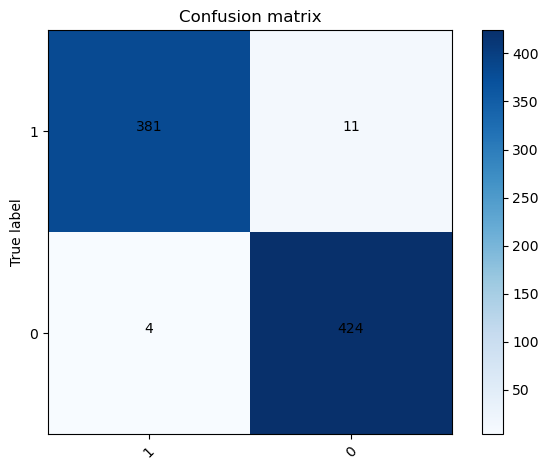

In [34]:
cm=confusion_matrix(y_train, knn_pred)
np.set_printoptions(precision=2)
print (classification_report(y_train, knn_pred))
plt.figure()
plot_confusion_matrix(cm, classes=['1','0'],normalize= False,  title='Confusion matrix')

## Decision Tree

In [35]:
tree= DecisionTreeClassifier(criterion= 'gini', max_depth =20, max_features='sqrt', min_samples_leaf= 4,min_samples_split=10, random_state=None, splitter='random')
tree.fit(x_train_prepared,y_train)
sample_data(tree)

prediction : [0 1 0 1 1]
labels: [0, 1, 1, 1, 1]


In [36]:
tree_pred = cross_val_predict(tree, x_train_prepared, y_train, cv=5)
precision = precision_score(y_train, tree_pred)
recall = recall_score(y_train, tree_pred)
fscore=f1_score(y_train ,tree_pred )
accuracy=accuracy_score(y_train ,tree_pred)
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"fscore score: {fscore}")
print(f"accuracy score: {accuracy}")

Precision score: 0.8337028824833703
Recall score: 0.8785046728971962
fscore score: 0.8555176336746303
accuracy score: 0.8451219512195122


In [37]:
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [None, 42]  
}
gridsearchcv(param_grid_tree , DecisionTreeClassifier())

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': None, 'splitter': 'best'}
Best Accuracy: 0.9829268292682926


              precision    recall  f1-score   support

           0       0.86      0.81      0.83       392
           1       0.83      0.88      0.86       428

    accuracy                           0.85       820
   macro avg       0.85      0.84      0.84       820
weighted avg       0.85      0.85      0.84       820

Confusion matrix, without normalization
[[317  75]
 [ 52 376]]


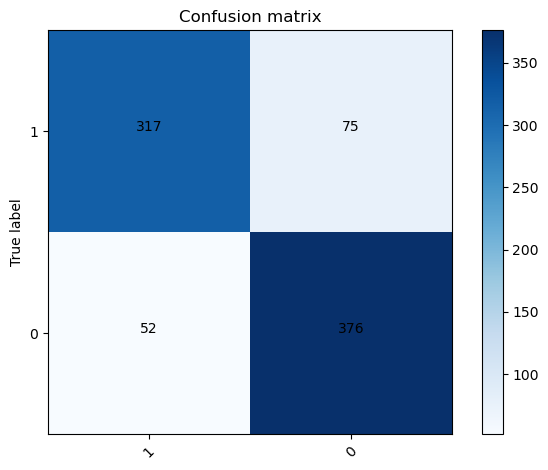

In [38]:
cm=confusion_matrix(y_train, tree_pred)
np.set_printoptions(precision=2)
print (classification_report(y_train, tree_pred))
plt.figure()
plot_confusion_matrix(cm, classes=['1','0'],normalize= False,  title='Confusion matrix')

## SVM

In [39]:
svm= SVC(C= 1000, gamma= 1, kernel='rbf')
svm.fit(x_train_prepared,y_train)
sample_data(svm)

prediction : [0 1 0 1 1]
labels: [0, 1, 1, 1, 1]


In [40]:
svm_pred = cross_val_predict(svm, x_train_prepared, y_train, cv=5)
precision = precision_score(y_train, svm_pred)
recall = recall_score(y_train, svm_pred)
fscore=f1_score(y_train ,svm_pred )
accuracy=accuracy_score(y_train ,svm_pred)
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"fscore score: {fscore}")
print(f"accuracy score: {accuracy}")

Precision score: 0.9531615925058547
Recall score: 0.9509345794392523
fscore score: 0.9520467836257309
accuracy score: 0.95


In [41]:
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],}  
gridsearchcv(param_grid_svm , SVC())

Best Hyperparameters: {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
Best Accuracy: 0.95


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       392
           1       0.95      0.95      0.95       428

    accuracy                           0.95       820
   macro avg       0.95      0.95      0.95       820
weighted avg       0.95      0.95      0.95       820

Confusion matrix, without normalization
[[372  20]
 [ 21 407]]


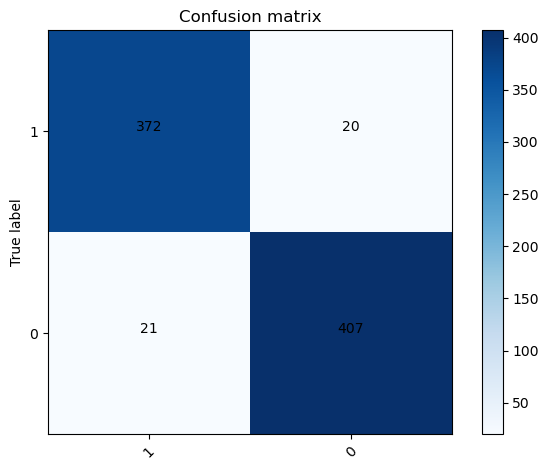

In [43]:
cm=confusion_matrix(y_train, svm_pred)
np.set_printoptions(precision=2)
print (classification_report(y_train, svm_pred))
plt.figure()
plot_confusion_matrix(cm, classes=['1','0'],normalize= False,  title='Confusion matrix')

## Evaluation

# KNN

In [44]:
x_test_prepared= full_pipeline.transform(x_test)
x_test_predict=knn.predict(x_test_prepared)
print(f"Precision_Score:{precision_score(y_test , x_test_predict)}")
print(f"Recall_Score:{recall_score(y_test , x_test_predict)}")
print(f"Accuracy:{accuracy_score(y_test , x_test_predict)}")

Precision_Score:1.0
Recall_Score:1.0
Accuracy:1.0


## SVM

In [45]:
x_test_prepared= full_pipeline.transform(x_test)
x_test_predict=svm.predict(x_test_prepared)
print(f"Precision_Score:{precision_score(y_test , x_test_predict)}")
print(f"Recall_Score:{recall_score(y_test , x_test_predict)}")
print(f"Accuracy:{accuracy_score(y_test , x_test_predict)}")

Precision_Score:0.9405940594059405
Recall_Score:0.9693877551020408
Accuracy:0.9560975609756097


## Decision Tree

In [46]:
x_test_prepared= full_pipeline.transform(x_test)
x_test_predict=tree.predict(x_test_prepared)
print(f"Precision_Score:{precision_score(y_test , x_test_predict)}")
print(f"Recall_Score:{recall_score(y_test , x_test_predict)}")
print(f"Accuracy:{accuracy_score(y_test , x_test_predict)}")

Precision_Score:0.8207547169811321
Recall_Score:0.8877551020408163
Accuracy:0.8536585365853658
